In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
gdp_df = pd.read_csv("C:\\Users\\April\\NSS\\python\\projects\\un_data-april1365\\data\\gdp_percapita.csv.csv")

In [3]:
gdp_df.head(5)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


In [4]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN
7175,Zimbabwe,1990,2652.129209,NaN


How many rows and columns are in gdp_df? What are the data types of each column?

7176 rows, 4 columns; object, integer, float, float

In [5]:
gdp_df.shape

(7176, 4)

gdp_df.dtypes

In [6]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [7]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [13]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_capita']

In [10]:
print(gdp_df)

     Country or Area  Year        Value
0        Afghanistan  2020  1970.560169
1        Afghanistan  2019  2065.036235
2        Afghanistan  2018  2033.804389
3        Afghanistan  2017  2058.400221
4        Afghanistan  2016  2057.067978
...              ...   ...          ...
7171        Zimbabwe  1994  2603.927369
7172        Zimbabwe  1993  2420.092791
7173        Zimbabwe  1992  2437.152908
7174        Zimbabwe  1991  2733.696626
7175        Zimbabwe  1990  2652.129209

[7176 rows x 3 columns]


How many countries have data for all years?

205 have data for all years. 

In [14]:
year_count = gdp_df.Country.value_counts()
year_count

Least developed countries: UN classification    31
Niger                                           31
Middle East & North Africa (IDA & IBRD)         31
Middle income                                   31
Mongolia                                        31
                                                ..
Kosovo                                          13
Turks and Caicos Islands                        10
Sint Maarten (Dutch part)                       10
Somalia                                          8
Djibouti                                         8
Name: Country, Length: 242, dtype: int64

In [15]:
year_count.to_frame()

,Country
Least developed countries: UN classification,31
Niger,31
Middle East & North Africa (IDA & IBRD),31
Middle income,31
Mongolia,31
...,...
Kosovo,13
Turks and Caicos Islands,10
Sint Maarten (Dutch part),10
Somalia,8


In [16]:
type(year_count)

pandas.core.series.Series

In [17]:
year_count = year_count.to_frame()

In [18]:
year_count.head(5)

,Country
Least developed countries: UN classification,31
Niger,31
Middle East & North Africa (IDA & IBRD),31
Middle income,31
Mongolia,31


In [19]:
year_count.Country.value_counts()

31    205
26     11
21      6
24      4
30      2
27      2
10      2
8       2
29      1
28      1
22      1
20      1
19      1
17      1
15      1
13      1
Name: Country, dtype: int64

Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [20]:
242 - 205

37

In [21]:
year_count.tail(37)

,Country
Turkmenistan,30
Hungary,30
Slovak Republic,29
Cambodia,28
West Bank and Gaza,27
Bosnia and Herzegovina,27
Slovenia,26
Latvia,26
Israel,26
Lithuania,26


GDP per capita for the year 2020. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [22]:
data = gdp_df

In [23]:
filtered_data = data[data['Year'] == 2020]

In [24]:
print(filtered_data)

                          Country  Year  GDP_Per_capita
0                     Afghanistan  2020     1970.560169
19    Africa Eastern and Southern  2020     3491.978104
50     Africa Western and Central  2020     4021.293919
81                        Albania  2020    13253.733337
112                       Algeria  2020    10735.382539
...                           ...   ...             ...
7025                      Vietnam  2020    10338.270543
7056           West Bank and Gaza  2020     5402.538773
7083                        World  2020    16269.969854
7114                       Zambia  2020     3277.816510
7145                     Zimbabwe  2020     2134.555461

[240 rows x 3 columns]


In [25]:
df = pd.DataFrame(filtered_data)

In [26]:
print(df)

                          Country  Year  GDP_Per_capita
0                     Afghanistan  2020     1970.560169
19    Africa Eastern and Southern  2020     3491.978104
50     Africa Western and Central  2020     4021.293919
81                        Albania  2020    13253.733337
112                       Algeria  2020    10735.382539
...                           ...   ...             ...
7025                      Vietnam  2020    10338.270543
7056           West Bank and Gaza  2020     5402.538773
7083                        World  2020    16269.969854
7114                       Zambia  2020     3277.816510
7145                     Zimbabwe  2020     2134.555461

[240 rows x 3 columns]


"unimodal, skewed left"

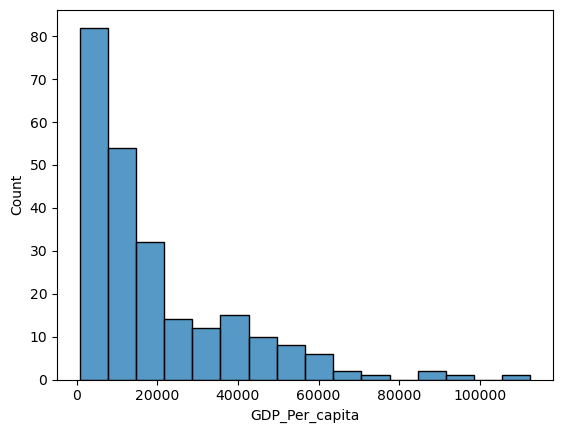

In [27]:
sns.histplot(data=df, x="GDP_Per_capita")
plt.show()

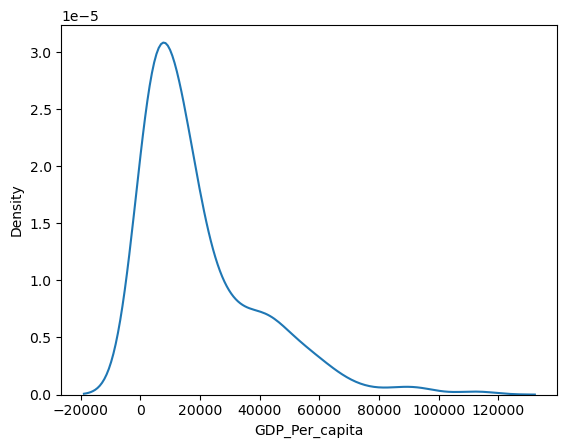

In [29]:
sns.kdeplot(df['GDP_Per_capita'])
plt.show()

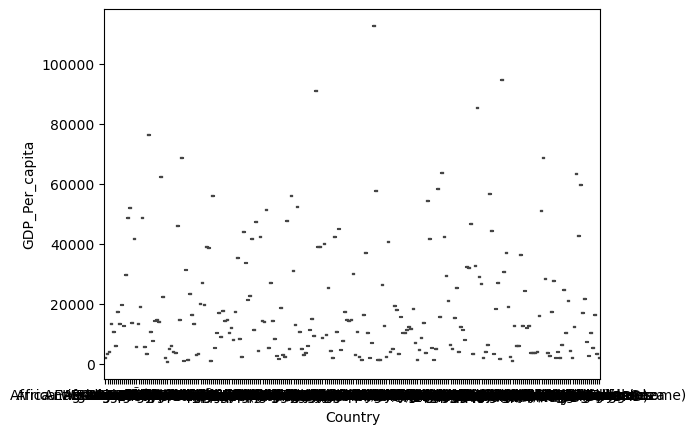

In [28]:
sns.boxplot(x='Country', y='GDP_Per_capita', data=df)
plt.show()

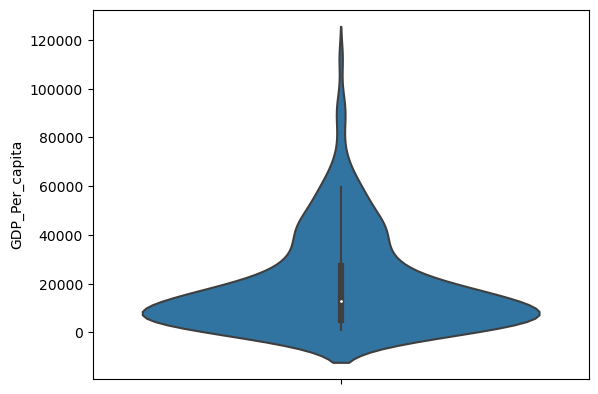

In [30]:
sns.violinplot(y=df["GDP_Per_capita"])
plt.show()

What was the median GDP per capita value in 2020?

12908.9374056206

In [31]:
median_column = df['GDP_Per_capita'].median()

In [32]:
print(median_column)

12908.9374056206


Create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create a boxplot, barplot, scatterplot, and scatterplot with trend line overlaid. 

In [33]:
years = [1990, 2000, 2010, 2020]
gdp_decades = data[data['Year'].isin(years)]

In [34]:
df = pd.DataFrame(gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_capita'>

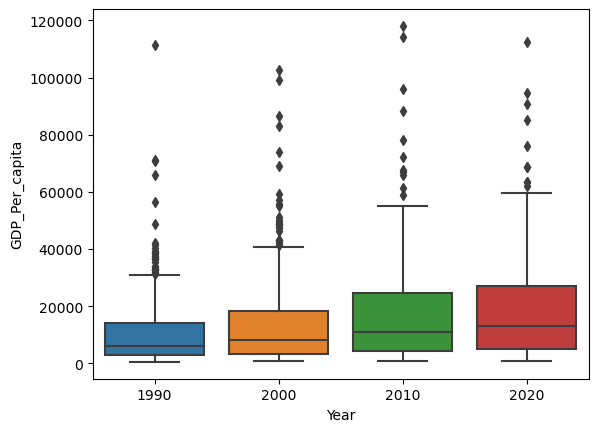

In [35]:
sns.boxplot( x=df["Year"], y=df["GDP_Per_capita"] )

<Axes: xlabel='Year', ylabel='GDP_Per_capita'>

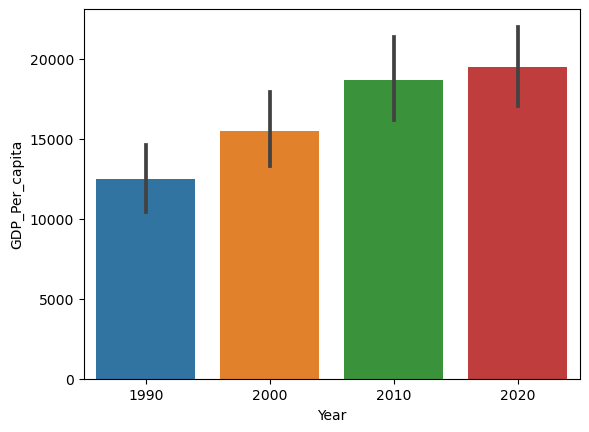

In [36]:
sns.barplot(x=df['Year'], y=df['GDP_Per_capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_capita'>

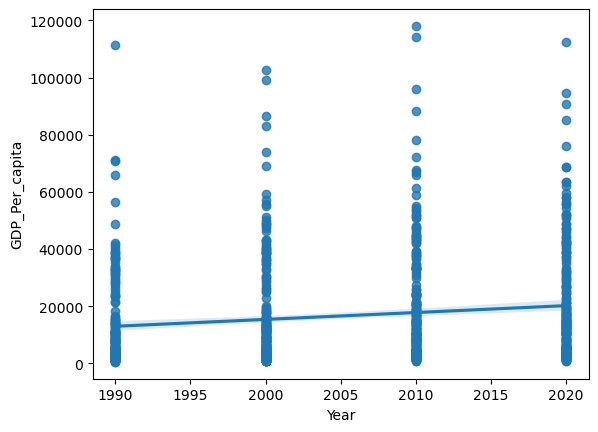

In [37]:
sns.regplot(x=df["Year"], y=df["GDP_Per_capita"])

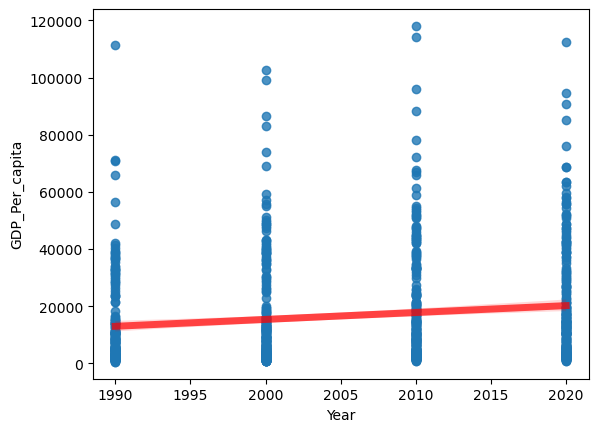

In [38]:
sns.regplot(x=df["Year"], y=df["GDP_Per_capita"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

GDP has increased throughout the decades. Each decade has had at least one outlier. I think the strongest is the scatter plot with trend line. It is easier to understand and more easily applicable to this dataframe.

Which country was the first to have a GDP per capita greater than $100,000?

UAE in 1990

In [39]:
print(data)

          Country  Year  GDP_Per_capita
0     Afghanistan  2020     1970.560169
1     Afghanistan  2019     2065.036235
2     Afghanistan  2018     2033.804389
3     Afghanistan  2017     2058.400221
4     Afghanistan  2016     2057.067978
...           ...   ...             ...
7171     Zimbabwe  1994     2603.927369
7172     Zimbabwe  1993     2420.092791
7173     Zimbabwe  1992     2437.152908
7174     Zimbabwe  1991     2733.696626
7175     Zimbabwe  1990     2652.129209

[7176 rows x 3 columns]


In [40]:
data.sort_values(by = 'GDP_Per_capita')

,Country,Year,GDP_Per_capita
4544,Mozambique,1992,436.720371
4543,Mozambique,1993,464.018358
4541,Mozambique,1995,469.189504
4546,Mozambique,1990,471.325103
4542,Mozambique,1994,475.249723
...,...,...,...
3915,"Macao SAR, China",2018,132373.544079
3922,"Macao SAR, China",2011,140321.907954
3921,"Macao SAR, China",2012,149702.441471
3919,"Macao SAR, China",2014,155201.740571


In [41]:
filtered_data = data[data['GDP_Per_capita'] > 100000]

In [42]:
print(filtered_data)

                   Country  Year  GDP_Per_capita
3882            Luxembourg  2020   112557.309472
3883            Luxembourg  2019   116518.276815
3884            Luxembourg  2018   115049.926079
3885            Luxembourg  2017   114985.842236
3886            Luxembourg  2016   116283.699681
3887            Luxembourg  2015   113182.728563
3888            Luxembourg  2014   113313.578898
3889            Luxembourg  2013   113050.663254
3890            Luxembourg  2012   112137.135491
3891            Luxembourg  2011   112998.390477
3892            Luxembourg  2010   114343.988089
3893            Luxembourg  2009   112230.081410
3894            Luxembourg  2008   118154.667184
3895            Luxembourg  2007   120647.822959
3896            Luxembourg  2006   113346.035782
3897            Luxembourg  2005   108632.360016
3898            Luxembourg  2004   107634.837198
3899            Luxembourg  2003   104743.000088
3900            Luxembourg  2002   103317.331098
3901            Luxe

In [43]:
min_year = filtered_data['Year'].min()

In [44]:
print(min_year)

1990


Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

Luxembourg

In [45]:
sorted_data = data.sort_values(by='GDP_Per_capita', ascending=False)

In [46]:
highest_2020 = sorted_data[sorted_data['Year'] == 2020].head(1)

In [47]:
print(highest_2020)

         Country  Year  GDP_Per_capita
3882  Luxembourg  2020   112557.309472


In [48]:
Lux = sorted_data[sorted_data['Country'] == 'Luxembourg']

In [49]:
df = pd.DataFrame(Lux)

In [50]:
print(Lux)

         Country  Year  GDP_Per_capita
3895  Luxembourg  2007   120647.822959
3894  Luxembourg  2008   118154.667184
3883  Luxembourg  2019   116518.276815
3886  Luxembourg  2016   116283.699681
3884  Luxembourg  2018   115049.926079
3885  Luxembourg  2017   114985.842236
3892  Luxembourg  2010   114343.988089
3896  Luxembourg  2006   113346.035782
3888  Luxembourg  2014   113313.578898
3887  Luxembourg  2015   113182.728563
3889  Luxembourg  2013   113050.663254
3891  Luxembourg  2011   112998.390477
3882  Luxembourg  2020   112557.309472
3893  Luxembourg  2009   112230.081410
3890  Luxembourg  2012   112137.135491
3897  Luxembourg  2005   108632.360016
3898  Luxembourg  2004   107634.837198
3899  Luxembourg  2003   104743.000088
3900  Luxembourg  2002   103317.331098
3901  Luxembourg  2001   101143.147977
3902  Luxembourg  2000    99301.526999
3903  Luxembourg  1999    94115.384035
3904  Luxembourg  1998    88185.800110
3905  Luxembourg  1997    83702.813530
3906  Luxembourg  1996   

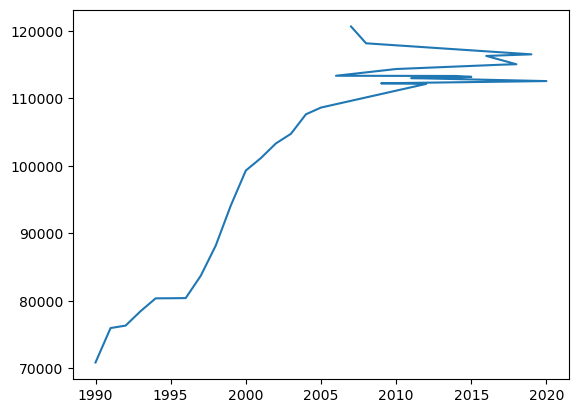

In [51]:
plt.plot( 'Year', 'GDP_Per_capita', data=df)

Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

sorted_data = data.sort_values(by='GDP_Per_capita', ascending=True)

In [52]:
lowest_2020 = sorted_data[sorted_data['Year'] == 2020].tail(1)

In [53]:
print(lowest_2020)

     Country  Year  GDP_Per_capita
914  Burundi  2020      731.064074


In [54]:
Bur = sorted_data[sorted_data['Country'] == 'Burundi']

In [55]:
df = pd.DataFrame(Bur)

In [56]:
print(Bur)

     Country  Year  GDP_Per_capita
943  Burundi  1991     1215.887215
942  Burundi  1992     1202.106321
944  Burundi  1990     1184.842032
941  Burundi  1993     1105.228711
940  Burundi  1994     1044.716092
939  Burundi  1995      947.822231
920  Burundi  2014      886.235296
921  Burundi  2013      877.272857
936  Burundi  1998      870.043821
922  Burundi  2012      862.715651
938  Burundi  1996      861.482899
923  Burundi  2011      852.502576
935  Burundi  1999      850.046951
924  Burundi  2010      846.169112
932  Burundi  2002      839.777920
937  Burundi  1997      839.196865
925  Burundi  2009      831.564843
934  Burundi  2000      828.000479
926  Burundi  2008      827.792334
933  Burundi  2001      826.028960
919  Burundi  2015      825.205574
930  Burundi  2004      817.461177
927  Burundi  2007      815.908213
928  Burundi  2006      815.053647
931  Burundi  2003      804.884232
929  Burundi  2005      798.704845
918  Burundi  2016      794.604340
917  Burundi  2017  

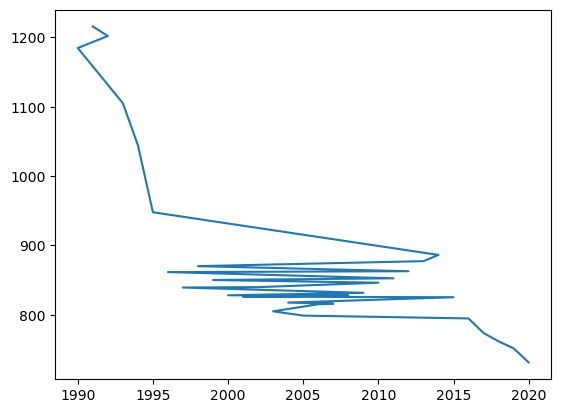

In [57]:
plt.plot( 'Year', 'GDP_Per_capita', data=df)

In [58]:
internet_df = pd.read_csv("C:\\Users\\April\\NSS\\python\\projects\\un_data-april1365\\data\\internet_use.csv.csv", nrows = 4495)

In [59]:
print(internet_df)

     Country or Area  Year     Value  Value Footnotes
0        Afghanistan  2014  6.390000              NaN
1        Afghanistan  2013  5.900000              NaN
2        Afghanistan  2012  5.454545              NaN
3        Afghanistan  2011  5.000000              NaN
4        Afghanistan  2010  4.000000              NaN
...              ...   ...       ...              ...
4490        Zimbabwe  1997  0.033080              NaN
4491        Zimbabwe  1996  0.016790              NaN
4492        Zimbabwe  1995  0.007684              NaN
4493        Zimbabwe  1994  0.001739              NaN
4494        Zimbabwe  1990  0.000000              NaN

[4495 rows x 4 columns]


In [60]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [61]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

In [62]:
print(internet_df)

          Country  Year  Internet_Users_Pct
0     Afghanistan  2014            6.390000
1     Afghanistan  2013            5.900000
2     Afghanistan  2012            5.454545
3     Afghanistan  2011            5.000000
4     Afghanistan  2010            4.000000
...           ...   ...                 ...
4490     Zimbabwe  1997            0.033080
4491     Zimbabwe  1996            0.016790
4492     Zimbabwe  1995            0.007684
4493     Zimbabwe  1994            0.001739
4494     Zimbabwe  1990            0.000000

[4495 rows x 3 columns]


Look at the number of observations in this dataset per year. What do you notice?

1990 is an outlier. Excluding 1990, observations increased year after year from 1960 to 2021. 2012-2014 experienced a slight dip compared to 2011.

In [63]:
internet_df.Year.value_counts().sort_index(ascending=False)

2014    202
2013    202
2012    203
2011    207
2010    203
2009    203
2008    204
2007    206
2006    200
2005    201
2004    199
2003    196
2002    202
2001    201
2000    199
1999    198
1998    190
1997    184
1996    175
1995    138
1994     91
1993     65
1992     50
1991     39
1990    210
1989      8
1988      7
1987      7
1986      7
1985      7
1984      7
1983      7
1982      7
1981      7
1980      7
1979      7
1978      7
1977      7
1976      7
1975      7
1970      7
1965      7
1960      7
Name: Year, dtype: int64

What is the first year to have a non-zero internet users percentage value? 

1990

In [64]:
print(internet_df)

          Country  Year  Internet_Users_Pct
0     Afghanistan  2014            6.390000
1     Afghanistan  2013            5.900000
2     Afghanistan  2012            5.454545
3     Afghanistan  2011            5.000000
4     Afghanistan  2010            4.000000
...           ...   ...                 ...
4490     Zimbabwe  1997            0.033080
4491     Zimbabwe  1996            0.016790
4492     Zimbabwe  1995            0.007684
4493     Zimbabwe  1994            0.001739
4494     Zimbabwe  1990            0.000000

[4495 rows x 3 columns]


In [65]:
data = internet_df

In [66]:
data.sort_values(by = 'Internet_Users_Pct')

,Country,Year,Internet_Users_Pct
4494,Zimbabwe,1990,0.0000
3897,Syria,1992,0.0000
3898,Syria,1991,0.0000
3899,Syria,1990,0.0000
1363,Fiji,1990,0.0000
...,...,...,...
1868,Iceland,2012,96.2098
3016,Norway,2014,96.3000
1867,Iceland,2013,96.5468
415,Bermuda,2014,96.8000


In [67]:
filtered_data = data[data['Internet_Users_Pct'] > 0]

In [ ]:
print(filtered_data)

In [ ]:
sorted_data = filtered_data.sort_values(by='Year', ascending=True)

In [ ]:
print(sorted_data)

How does the distribution of internet users percent differ for 2000 and 2014?

Every country saw an increase in this timeframe, most with stark increases. Some countries didn't have data for both years, so no comparison could be made.

In [ ]:
data = internet_df

In [ ]:
filtered_data = data[data['Year'].isin([2000, 2014])]

In [ ]:
print(filtered_data.to_string(index=False, max_rows=None))

For how many countries was the percentage of internet users below 5% in 2014?

16

In [ ]:
filtered_data = data[data['Year'].isin([2014]) & (data['Internet_Users_Pct'] < 5)]

In [ ]:
print(filtered_data)

In [ ]:
count = len(filtered_data)
print(count)

Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.

In [ ]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, 
                               left_on=['Country', 'Year'], right_on=['Country', 'Year'], 
                               how='outer')

In [ ]:
print(gdp_and_internet_use)

Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid to compare how the GDP per capita has changed over time for these three countries. What do you notice?

Iceland, Bermuda, Norway

In [ ]:
data = gdp_and_internet_use

In [ ]:
filtered_data = data.loc[data["Country"].isin(['Iceland', 'Bermuda', 'Norway'])]

In [ ]:
filtered_data.sort_values(by="Internet_Users_Pct", ascending=False).head(3)

In [ ]:
df = filtered_data

In [ ]:
top3 = sns.FacetGrid(df)
top3.map(sns.scatterplot, "Year", "GDP_Per_capita")
top3.set_axis_labels("Year", "GDP per capita")